In [1]:
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os
import glob
from osgeo import gdal
import scipy.ndimage
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import csv
import pprint
import h5py 
import gdal
from gdalconst import *
import datetime
import seaborn as sns
from numpy import zeros, newaxis
from scipy import stats
from statistics import mean
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
change_cmap = colors.ListedColormap(["gainsboro","blue", "red"])

In [3]:
H20V08_LC = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2008001.h20v08.006.2018145230633.hdf", header=None)
H20V08_LC = H20V08_LC.to_numpy()

In [4]:
H19V07_2002 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2002001.h19v07.006.2018143094643.hdf", header=None)
H19V08_2002 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2002001.h19v08.006.2018143094833.hdf", header=None)
H20V07_2002 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2002001.h20v07.006.2018143100611.hdf", header=None)
H20V08_2002 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2002001.h20v08.006.2018143100623.hdf", header=None)

H19V07_2018 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2018001.h19v07.006.2019199234545.hdf", header=None)
H19V08_2018 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2018001.h19v08.006.2019199224420.hdf", header=None)
H20V07_2018 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2018001.h20v07.006.2019200004619.hdf", header=None)
H20V08_2018 = pd.read_csv("D:\\masters_data\\MODIS_LC\\LC_Data\\MCD12Q1.A2018001.h20v08.006.2019199225416.hdf", header=None)

In [5]:
H19V07_2002_LC = H19V07_2002.to_numpy()
H19V08_2002_LC = H19V08_2002.to_numpy()
H20V07_2002_LC = H20V07_2002.to_numpy()
H20V08_2002_LC = H20V08_2002.to_numpy()

H19V07_2018_LC = H19V07_2018.to_numpy()
H19V08_2018_LC = H19V08_2018.to_numpy()
H20V07_2018_LC = H20V07_2018.to_numpy()
H20V08_2018_LC = H20V08_2018.to_numpy()

In [6]:
LC_2002_left = np.concatenate((H19V07_2002_LC,H19V08_2002_LC), axis=0)
LC_2002_right = np.concatenate((H20V07_2002_LC,H20V08_2002_LC), axis=0)
LC_2002 = np.concatenate((LC_2002_left,LC_2002_right), axis=1)

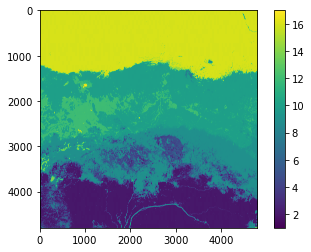

In [7]:
plt.imshow(LC_2002)
plt.colorbar()

In [8]:
LC_2018_left = np.concatenate((H19V07_2018_LC,H19V08_2018_LC), axis=0)
LC_2018_right = np.concatenate((H20V07_2018_LC,H20V08_2018_LC), axis=0)
LC_2018 = np.concatenate((LC_2018_left,LC_2018_right), axis=1)

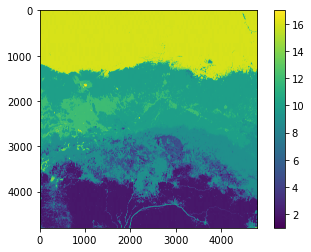

In [9]:
plt.imshow(LC_2018)
plt.colorbar()

In [10]:
LC_2002_mask = np.zeros((4800, 4800))
# low_low / low_med / low_high
LC_2002_mask[(LC_2002 == 13)==1] = 1
LC_2002_mask[(LC_2002 == 12)==1] = 2

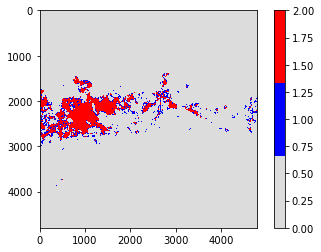

In [11]:
plt.imshow(LC_2002_mask, cmap = change_cmap)
plt.colorbar()

In [12]:
LC_2018_mask = np.zeros((4800, 4800))
# low_low / low_med / low_high
LC_2018_mask[(LC_2018 == 13)==1] = 1
LC_2018_mask[(LC_2018 == 12)==1] = 2

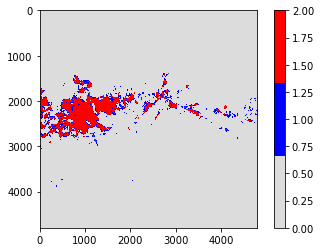

In [13]:
plt.imshow(LC_2018_mask, cmap = change_cmap)
plt.colorbar()

In [14]:
count_2002 = (LC_2002_mask == 2).sum()
count_2018 = (LC_2018_mask == 2).sum()

In [15]:
print(count_2002)
print(count_2018)

1366424
1301922


interestingly found a decrease in cropland areas? - issue with definition of cropland in MODIS tiles?

In [16]:
print("Land cover change between 2002/2018")
print()
print("Category \t\t\t 2002 \t\t 2018 \t\t change")
print("Evergreen Needleleaf Forests \t",(LC_2002 == 1).sum(), "\t\t", (LC_2018 == 1).sum(), "\t\t", ((LC_2018 == 1).sum()- (LC_2002 == 1).sum()) )
print("Evergreen Broadleaf Forests \t",(LC_2002 == 2).sum(), "\t", (LC_2018 == 2).sum(), "\t", ((LC_2018 ==2).sum()- (LC_2002 == 2).sum()))
print("Deciduous Needleleaf Forests \t",(LC_2002 == 3).sum(), "\t\t", (LC_2018 == 3).sum(), "\t\t", ((LC_2018 == 3).sum()- (LC_2002 == 3).sum()))
print("Deciduous Broadleaf Forests \t",(LC_2002 == 4).sum(), "\t", (LC_2018 == 4).sum(), "\t", ((LC_2018 == 4).sum()- (LC_2002 == 4).sum()))
print("Mixed Forests \t\t\t",(LC_2002 == 5).sum(), "\t", (LC_2018 == 5).sum(), "\t", ((LC_2018 == 5).sum()- (LC_2002 == 5).sum()))
print("Closed Shrublands \t\t",(LC_2002 == 6).sum(), "\t\t", (LC_2018 == 6).sum(), "\t\t", ((LC_2018 == 6).sum()- (LC_2002 == 6).sum()))
print("Open Shrublands \t\t",(LC_2002 == 7).sum(), "\t\t", (LC_2018 == 7).sum(), "\t\t", ((LC_2018 == 7).sum()- (LC_2002 == 7).sum()))
print("Woody Savannahs \t\t",(LC_2002 == 8).sum(), "\t", (LC_2018 == 8).sum(), "\t", ((LC_2018 == 8).sum()- (LC_2002 == 8).sum()))
print("Savannahs  \t\t\t",(LC_2002 == 9).sum(), "\t", (LC_2018 == 9).sum(), "\t", ((LC_2018 == 9).sum()- (LC_2002 == 9).sum()))
print("Grasslands \t\t\t",(LC_2002 == 10).sum(), "\t", (LC_2018 == 10).sum(), "\t", ((LC_2018 == 10).sum()- (LC_2002 == 10).sum()))
print("Permanent Wetlands \t\t",(LC_2002 == 11).sum(), "\t\t", (LC_2018 == 11).sum(), "\t\t", ((LC_2018 == 11).sum()- (LC_2002 == 11).sum()))
print("Croplands \t\t\t",(LC_2002 == 12).sum(), "\t", (LC_2018 == 12).sum(), "\t", ((LC_2018 == 12).sum()- (LC_2002 == 12).sum()))
print("Urban and Built-up Lands \t",(LC_2002 == 13).sum(), "\t\t", (LC_2018 == 13).sum(), "\t\t", ((LC_2018 == 13).sum()- (LC_2002 == 13).sum()))
print("Cropland/NVM \t\t\t",(LC_2002 == 14).sum(), "\t\t", (LC_2018 == 14).sum(), "\t\t", ((LC_2018 == 14).sum()- (LC_2002 == 14).sum()))
print("Permanent Snow and Ice \t\t",(LC_2002 == 15).sum(), "\t\t", (LC_2018 == 15).sum(), "\t\t", ((LC_2018 == 15).sum()- (LC_2002 == 15).sum()))
print("Barren \t\t\t\t",(LC_2002 == 16).sum(), "\t", (LC_2018 == 16).sum(), "\t", ((LC_2018 == 16).sum()- (LC_2002 == 16).sum()))
print("Water Bodies \t\t\t",(LC_2002 == 17).sum(), "\t\t", (LC_2018 == 17).sum(), "\t\t", ((LC_2018 == 17).sum()- (LC_2002 == 17).sum()))

Land cover change between 2002/2018

Category 			 2002 		 2018 		 change
Evergreen Needleleaf Forests 	 14 		 9 		 -5
Evergreen Broadleaf Forests 	 4834010 	 4891798 	 57788
Deciduous Needleleaf Forests 	 0 		 1 		 1
Deciduous Broadleaf Forests 	 455049 	 352225 	 -102824
Mixed Forests 			 304503 	 393127 	 88624
Closed Shrublands 		 78 		 118 		 40
Open Shrublands 		 22343 		 14638 		 -7705
Woody Savannahs 		 605959 	 707409 	 101450
Savannahs  			 3521960 	 3432867 	 -89093
Grasslands 			 5358932 	 5446247 	 87315
Permanent Wetlands 		 47964 		 52807 		 4843
Croplands 			 1366424 	 1301922 	 -64502
Urban and Built-up Lands 	 12278 		 13053 		 775
Cropland/NVM 			 88672 		 87146 		 -1526
Permanent Snow and Ice 		 1 		 0 		 -1
Barren 				 6406785 	 6332888 	 -73897
Water Bodies 			 15028 		 13745 		 -1283


Discuss with Niels 
- increase in urban / bult up areas is expected
- clear descrease in croplands isn't
        - Maybe cropland has been interprated as grasslands? Still not that much of an increase tbh

Can make yearly plots of this?

To make yearly plots, what I will need to do is:
    - for each array create a dataframe including:
        - Latitude, Longitude, year, LC
    - concatenate every array,
    - Load into QGIS and remove any thats outside area
    - Make plots